# *Wavelet smooth function*

---

This notebook explore how to smooth a signal using the wavelet python libraries.

In [27]:
using PyCall, PyPlot, CSV, DataFrames, StatsBase

In [10]:
dataFileName = "../../../data/fda/mBaseline.csv";
dfData  = DataFrame!(CSV.File(dataFileName; comment = "#"))
first(dfData,3)

,StudyID,Arm,T00h00,T00h01,T00h02,T00h03,T00h04,T00h05,T00h06,T00h07
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,1,4.83333,0.0,1.83333,3.5,3.5,4.66667,3.0,27.8333
2,4,3,18.0,23.7143,44.0,52.4286,34.2857,20.1429,13.7143,9.14286
3,40,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
matAct = copy(transpose(convert(Matrix, dfData[:,3:end])));
vecAct = matAct[:, 5];


In [95]:
# Using Python libraries from Julia
@pyimport pylab 
@pyimport pywt

# import mWavelet
mydb8 = pywt.Wavelet("db8");
mylevel = 7
noisy_coefs = pywt.wavedec(vecAct, mydb8, level=mylevel, mode="constant");

C:\Users\Fenril-Fractal\.julia\conda\3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [96]:
mySigma = mad(noisy_coefs[mylevel+1], normalize = true)
uthresh = mySigma* sqrt(2*log(length(noisy_coefs[mylevel+1])))

 denoised = mWavelet.mThreshMax(noisy_coefs, uthresh);

# denoised = mWavelet.mThreshSoft(noisy_coefs, uthresh);


signal = pywt.waverec(denoised, mydb8, mode="constant");

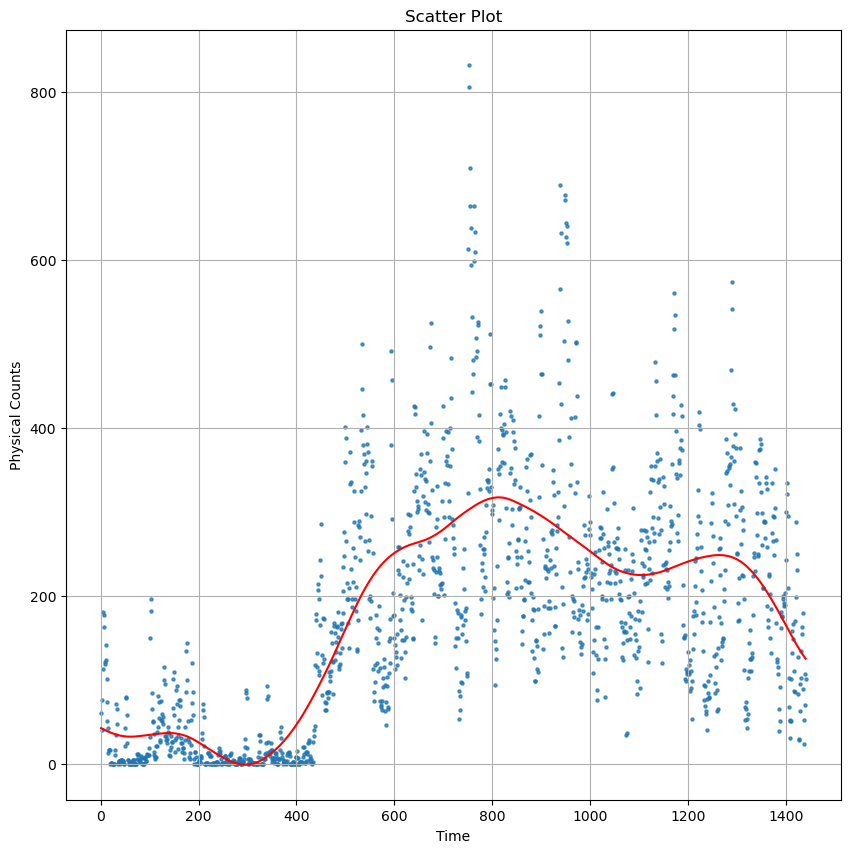

In [97]:
##################
#  Scatter Plot  #
##################
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

#################
#  Create Data  #
#################
x = collect(1:1:1440)
y = vecAct[:]
areas = 5;


fig = figure("pyplot_scatterplot",figsize=(10,10))
# ax = axes()
scatter(x,y,s=areas,alpha=0.75);plot(collect(1:1440), signal,color = "r");

title("Scatter Plot")
xlabel("Time")
ylabel("Physical Counts")
grid("on")
#gcf() # Needed for IJulia to plot inline

In [20]:
# pyimport_conda("pywt", "pywavelets")

In [46]:
module mWavelet

function mThreshSoft(WaveletData::Array{Array{Float64,1},1}, myThresh::Float64)
    numLevel = length(WaveletData)
    for i in 2:numLevel
        myWaveCoefs = WaveletData[i]
        newCoefs = map(x ->abs(0.5.*(sign(abs(x)-myThresh)^sign(abs(x)-myThresh)+1)), myWaveCoefs).*
                    sign.(myWaveCoefs).*(abs.(myWaveCoefs)-myThresh);
        WaveletData[i] = newCoefs;
    end
    return WaveletData
end


function mThreshHard(WaveletData::Array{Array{Float64,1},1}, myThresh::Float64)
    numLevel = length(WaveletData)
    for i in 2:numLevel
        myWaveCoefs = WaveletData[i]
        newCoefs = map(x ->abs(0.5*(sign(abs(x)-myThresh)^sign(abs(x)-myThresh)+1)), myWaveCoefs).*myWaveCoefs;
        WaveletData[i] = newCoefs;
    end
    return WaveletData
end

function mThreshMax(WaveletData::Array{Array{Float64,1},1}, myThresh::Float64)
    numLevel = length(WaveletData)
    for i in 2:numLevel
        myWaveCoefs = WaveletData[i]
        newCoefs = 0. * myWaveCoefs;
        WaveletData[i] = newCoefs;
    end
    return WaveletData
end

end

Main.mWavelet